## Question 1

### Answer
According to the question, we can know that: $f=f(\rho_t), \rho_t=\rho(\sigma_t^M,\sigma_t^S), \sigma_t^S=\sigma_t^S(\sigma_t^I,\sigma_t^M)$

So we can also learn that $df=\frac{\partial f}{\partial t}*dt+\frac{\partial f}{\partial \sigma^I}*d\sigma^I+\frac{1}{2}*\frac{\partial^2 f}{\partial\sigma^2}(d\sigma_t^I)^2*\frac{\partial f}{\partial \sigma^M}d\sigma^M+\frac{\partial^2 f}{2 \partial\sigma^{M^2}}d\sigma^{M^2}+\rho\frac{\partial^2 f}{\partial \sigma^2\sigma^M}d\sigma^2d\sigma^M$

Since the two factors are independent, so their correlation is 0 which $\rho=0$

$$\therefore df=\frac{\partial f}{\partial t}*dt+\frac{\partial f}{\partial \sigma^I}*K^I(\bar{\sigma^I}-\sigma_t^I)dt+b^I\sigma_t^IdW3_t+\frac{1}{2}*b^{I^2}\sigma_t^{I^2}\frac{\partial^2 f}{\partial\sigma^2}dW3_t^2+\frac{\partial f}{\partial \sigma^M}K^M(\bar{\sigma^M}-\sigma_t^M)dt+b^M\sigma_t^MdW4_t+\frac{1}{2}b^{M^2}\sigma^{M^2}_t\frac{\partial^2 f}{\partial\sigma^{M^2}}dW4^2_t$$

And based on stochastic calculus, we can know that:
$$E(dW3_t)=E(dW4_t)=0,E(dW3_t^2)=E(dW4_t^2)=dt$$

Under the risk neutral condition:
$$E(df)=2fdt$$

So we get our answer:
$$\therefore rf=\frac{\partial f}{\partial t}+K^I(\bar{\sigma^I}-\sigma_t^I)\frac{\partial f}{\partial \sigma^2}+\frac{1}{2}b^{I^2}\sigma_t^{I^2}\frac{\partial^2 f}{\partial {\sigma_t^I}^2}+K^M(\bar{\sigma^M}-\sigma_t^M)+\frac{1}{2}b^{M^2}\sigma_t^{M^2}\frac{\partial^2 f}{\partial \sigma_t^{M^2}}$$

## Question 2 
### Question 2.1

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# define the param
T = 3/12
N = 21*24*3
dt = T/N 
delta = 1/(24*252)
mus = 0.0
mum = 0.0
bI = 0.5
bM = 0.5
kI = 2.0
kM = 2.0
beta = 1.0
barsigma_I = 0.25
barsigma_M = 0.15

dw1t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)
dw2t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)
dw3t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)
dw4t = np.random.normal(size=(200, 21*24*3))*np.sqrt(dt)

rs = np.zeros((200, 21*24*3))
rm = np.zeros((200, 21*24*3))
sigmai = np.zeros((200, 21*24*3))
sigma_m = np.zeros((200, 21*24*3))

for i in range (200):
    sigma_I = 0.25
    sigma_M = 0.15
    for j in range (21*24*3):
        rts = mus*dt + sigma_I * dw1t[i][j] + beta * sigma_M * dw2t[i][j]
        rtm = mum*dt + sigma_M * dw2t[i][j]

        dsigma_I = kI * (barsigma_I - sigma_I) * dt+bI * sigma_I * dw3t[i][j]
        dsigma_M = kM * (barsigma_M - sigma_M) * dt+bM * sigma_M * dw4t[i][j]

        sigma_I = sigma_I + dsigma_I
        sigma_M = sigma_M + dsigma_M

        rs[i][j] = rts
        rm[i][j] = rtm
        sigmai[i][j] = sigma_I
        sigma_m[i][j] = sigma_M



### Question 2.2.1 and 2.2.2
For this part of question, first we get the profit.

In [3]:
sigma_tilde_M = barsigma_M
sigma_tilde_S = np.sqrt(barsigma_I ** 2 + (beta * barsigma_M)**2)

profit1 = np.sqrt(np.sum(np.square(rm),axis=1)/T) - sigma_tilde_M
profit2 = sigma_tilde_S - np.sqrt(np.sum(np.square(rs),axis=1)/T)

profit = profit1+profit2

print("part A Answer:", profit[0:10].round(4))

part A Answer: [-0.0164 -0.007  -0.0085  0.0068 -0.0369  0.0005 -0.0228 -0.0152  0.0142
 -0.0276]


In [4]:
sigma_s = np.sqrt(sigmai ** 2 + (beta * sigma_m)**2)
rho_mtrix = (beta * sigma_m) / sigma_s
rho = np.mean(rho_mtrix, axis=1)
print("part B Answer:",rho[0:10].round(4))

part B Answer: [0.4857 0.529  0.5616 0.4675 0.461  0.5033 0.4769 0.4915 0.5829 0.4627]


### Question 2.2.3

In [5]:
corr_matrix = np.zeros((200,))
for i in range (200):
    corr_matrix[i] = np.corrcoef(rs[i,:], rm[i,:])[1,0]
answer=corr_matrix[0:10] / 200
print("part C Answer:",answer.round(4))

part C Answer: [0.0024 0.0025 0.0026 0.0024 0.0023 0.0025 0.0022 0.0025 0.0029 0.0024]


### Question 2.3


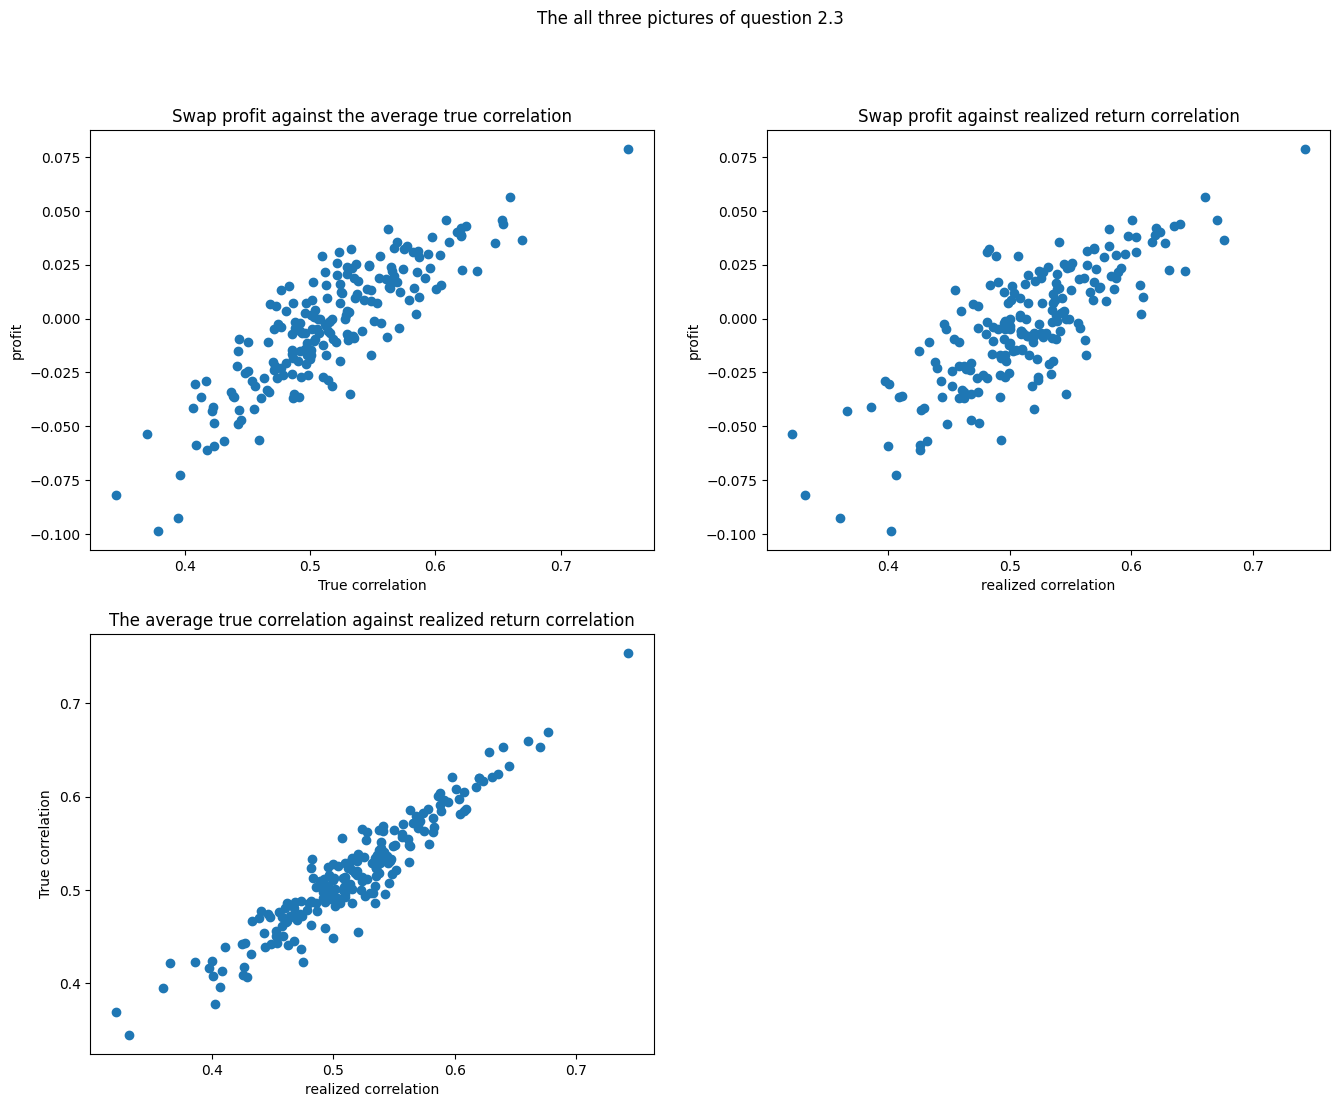

In [6]:
plt.figure(figsize=(16,12), dpi=100)
x = rho
y = profit
plt.subplot(2,2,1)
plt.xlabel("True correlation")
plt.ylabel("profit")
plt.title('Swap profit against the average true correlation')
plt.scatter(x, y)


x = corr_matrix
y =profit
plt.subplot(2,2,2)
plt.xlabel("realized correlation")
plt.ylabel("profit")
plt.title('Swap profit against realized return correlation')
plt.scatter(x, y)


x = corr_matrix
y = rho
plt.subplot(2,2,3)
plt.xlabel("realized correlation")
plt.ylabel("True correlation")
plt.title('The average true correlation against realized return correlation')
plt.scatter(x, y)

plt.suptitle("The all three pictures of question 2.3")
plt.show()


In [7]:
df = pd.DataFrame({'col1':profit.flatten(), 'col2':rho.flatten(), 'col3':corr_matrix.flatten()})

rho_mean =  df.loc[(df['col1'] > -0.005) & (df['col1'] < 0.005), ['col2']].mean()
corr_matrix_mean = df.loc[(df['col1'] > -0.005) & (df['col1'] < 0.005), ['col3']].mean()

print("true correlation:", rho_mean[0])
print("realized sample correlation:", corr_matrix_mean[0])

breakeven_correlation = (rho_mean[0] +corr_matrix_mean[0]) / 2
print("breakeven correlation :",breakeven_correlation)

true correlation: 0.5129758045223177
realized sample correlation: 0.5170162260824712
breakeven correlation : 0.5149960153023945


The breakeven correlation for the trade is the return which is equal to 0. And get the average of true correlation and realized sample correlation is shown below. And I choose the true correlation value as breakeven correlation which is 0.5041475659362336. 

In [8]:




profit_mean_above = df.loc[(df['col2'] > breakeven_correlation+0.1), ['col1']].mean()
profit_mean_below = df.loc[(df['col2'] < breakeven_correlation-0.1), ['col1']].mean()

print("If trade 0.1 higher than breakeven value, you can make",profit_mean_above[0] * 10000000,"profit")
print("if lower 0.1 than breakeven value it will lose",-profit_mean_below[0] * 10000000)

If trade 0.1 higher than breakeven value, you can make 417731.79377978534 profit
if lower 0.1 than breakeven value it will lose 629729.2846553762


### Question 3

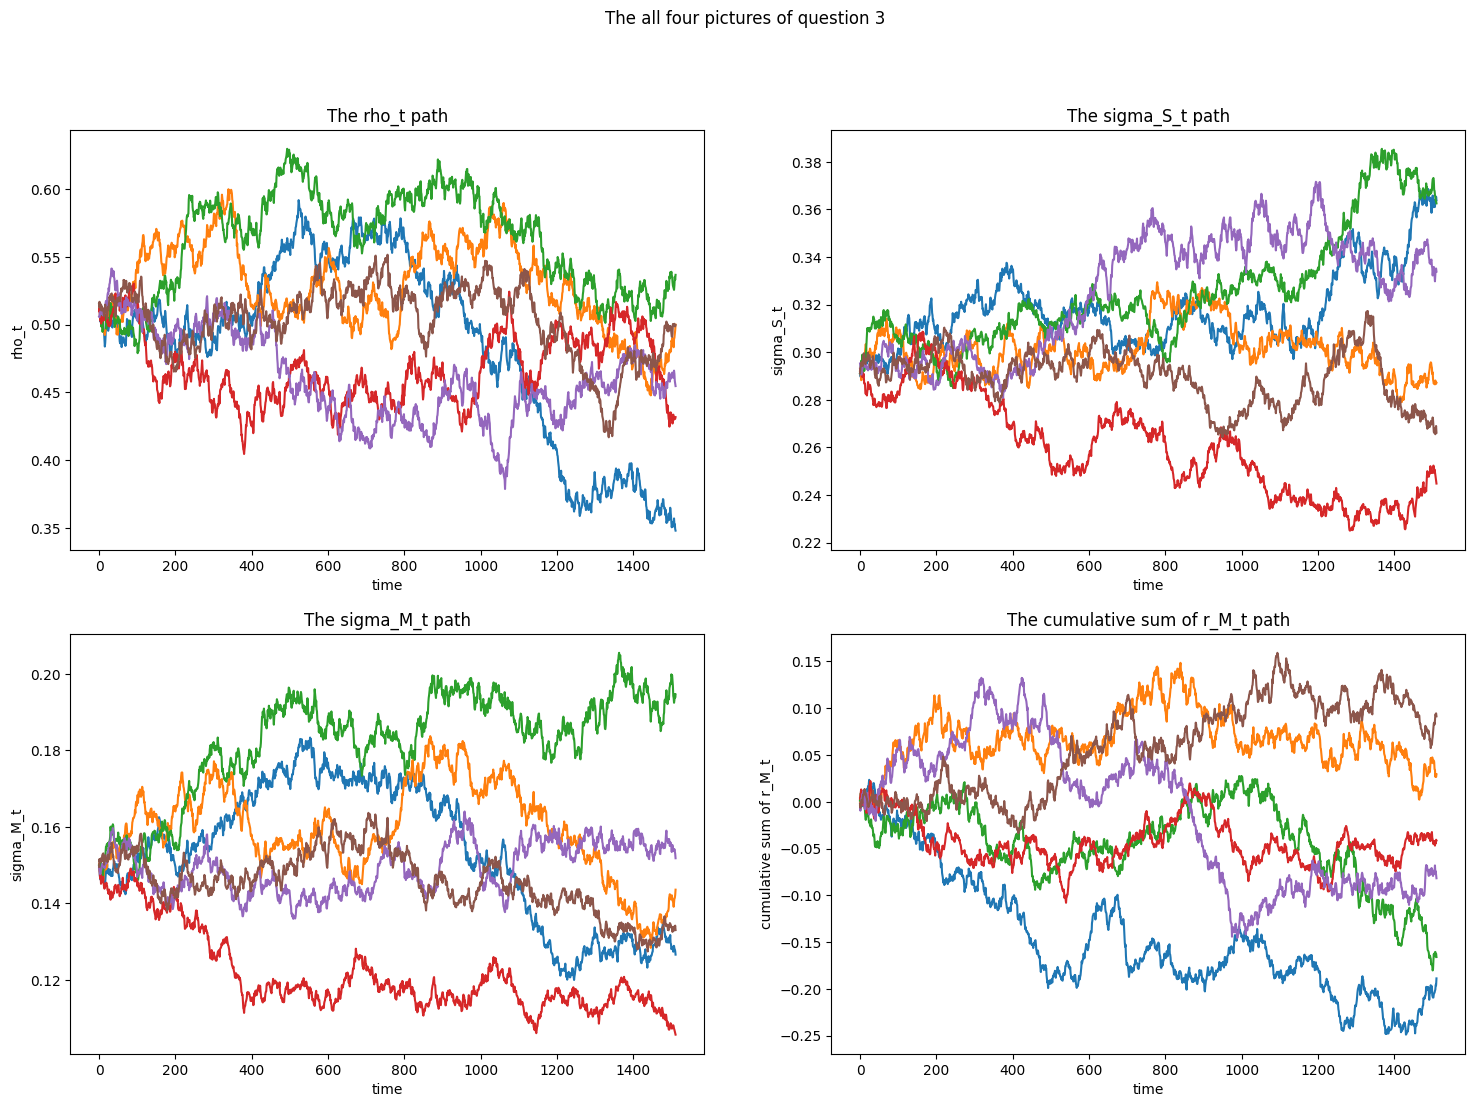

In [9]:
plt.figure(figsize=(18,12), dpi=100)
plt.subplot(2,2,1)
for i in range(6):
    plt.plot(rho_mtrix[i,:])
plt.xlabel("time")
plt.ylabel("rho_t")
plt.title('The rho_t path')


plt.subplot(2,2,2)
for i in range(6):
    plt.plot(sigma_s[i,:])
plt.xlabel("time")
plt.ylabel("sigma_S_t")
plt.title('The sigma_S_t path')


plt.subplot(2,2,3)
for i in range(6):
    plt.plot(sigma_m[i,:])
plt.xlabel("time")
plt.ylabel("sigma_M_t")
plt.title('The sigma_M_t path')

plt.subplot(2,2,4)
rts_new = np.cumprod(rs+1, axis = 1) - 1
for i in range(6):
    plt.plot(rts_new[i,:])
plt.xlabel("time")
plt.ylabel("cumulative sum of r_M_t")
plt.title('The cumulative sum of r_M_t path')


plt.suptitle("The all four pictures of question 3")
plt.show()

### Question 4

In [10]:
data=pd.read_csv("D://stock_data/SectorETF_vols_to_post.csv")
pay = data.iloc[0, 2] - data.iloc[0, 3]
mean1 = data["implied_may"][1:].mean()
mean2 = data["60d_historical_august"][1:].mean()
sector = mean1 - mean2
total = sector - pay
answer=total * 0.01 * 10000000
print(answer.round(2))

-113333.33
